<a href="https://colab.research.google.com/github/3B032049/2025_ML_hws/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

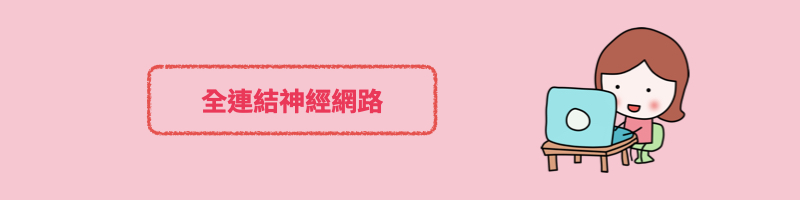

# 11.2讀入基本套件

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [104]:
from tensorflow.keras.datasets import fashion_mnist #流行衣物

# 11.4切分訓練資料和測試資料

In [105]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [106]:
labels = ["T-shirt/top(T恤)", "Trouser (褲子)", "Pullover(套衫)", "Dress(裙子) ","Coat(外套)", "Sandal (涼鞋)"
,"Shirt (汗衫)", "Sneaker(運動鞋)", "Bag(包)" ,"Ankle boot(踝靴)"]


# 11.5欣賞一下資料

In [107]:
x_train.shape

(60000, 28, 28)

In [108]:
x_test.shape

(10000, 28, 28)

In [109]:
n = 9487 #隨機看一筆資料的長相
x_train[n] #讀出第 n 筆資料

array([[  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,  79, 116,  76,
         28,  61, 116, 123,  52,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 174, 166, 178,
        107, 150, 150, 167, 157,  20,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  88, 130, 148, 151,
         84, 131, 159, 134, 123,  21,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  97, 120, 111, 139,
        163, 155, 111, 110, 139,  28,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  99, 126, 112,  99,
         97, 103, 108, 107, 139,  32,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 106, 119, 104, 102,
        111, 110, 103,  96, 136,  36,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 110, 116,  93,  96,
         96,  97,  92,  93, 138,  41,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 112, 115,  95,  91,
         96, 100,  96,  96, 143,  49,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 122, 111,  93,  95,
         97, 100,  97,  93, 135,  60,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1, 128, 108,  95,  96,
         95,  95,  93,  92, 128,  95,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  71, 130, 103,  97,  93,
         93,  91,  92,  92, 111, 138,  20,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 120, 122, 107,  97,  92,
         97,  92,  96,  96, 111, 144,  59,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 112, 119, 106,  99,  93,
         95,  92,  92,  96, 103, 146,  48,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 107, 119, 110,  97,  93,
         92,  99,  92,  95, 103, 150,  56,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  97, 116, 116,  95,  92,
         96,  99,  92,  99, 102, 144,  52,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  95, 116, 118, 100,  93,
         96,  92,  96, 100, 102, 136,  51,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 107, 119, 112, 103,  92,
         95,  93,  97,  99,  97, 126,  59,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 124, 116, 115, 112, 102,
         99,  96,  99, 100,  95, 126,  63,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 127, 112, 114, 114, 103,
        102, 102, 102,  99,  99, 132,  55,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 127, 110, 116, 114, 102,
         99, 103, 103, 100, 102, 124,  52,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 130, 110, 115, 112, 104,
        100,  97, 103, 107,  91, 159,  68,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 130, 110, 107, 118, 108,
        102,  97, 107, 115,  92, 175,  67,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 128, 118, 104, 123, 107,
        106, 104, 110, 111, 100, 134,  53,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 130, 119, 106, 124, 110,
        110, 108, 110, 110, 106, 135,  73,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

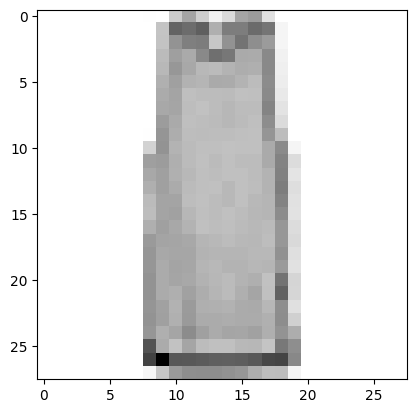

In [110]:
plt.imshow(x_train[n], cmap='Greys')

In [111]:
y_train[n] #第 n 筆資料的答案

np.uint8(0)

# 11.6打造函數學習機前的資料處理

因為 `numpy` 「廣播」的特性, 我們對 `array` 中所有數字要同除以一個數可瞬間完成!

In [112]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

In [113]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [114]:
y_train.shape

(60000, 10)

In [115]:
y_train[n]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# 12.1第一部曲：打造神經網路

In [116]:
model = Sequential()

In [117]:
model.add(Dense(100, input_dim=784, activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [118]:
model.add(Dense(100, activation='relu'))

In [119]:
model.add(Dense(100, activation='relu'))

In [120]:
model.add(Dense(10, activation='softmax'))

# 12.2組裝自己的神經網路

In [121]:
# 組裝神經網路
model.compile(loss='mse', optimizer=SGD(learning_rate=0.087),
              metrics=['accuracy'])

# 12.3欣賞自己的神經網路

In [122]:
# 看一下神經網路
model.summary()#(輸入*神經元)+b  784*100 +100

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 99,710 (389.49 KB)

 Trainable params: 99,710 (389.49 KB)

 Non-trainable params: 0 (0.00 B)

# 12.4第二部曲：訓練

In [123]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [124]:
#訓練
#model.fit(x_train, y_train, batch_size=100, epochs=20)

In [125]:
train_history =model.fit(x_train, y_train ,validation_split=0.2,epochs=10, batch_size=200,verbose=2)

Epoch 1/10
240/240 - 5s - 19ms/step - accuracy: 0.7849 - loss: 0.6154 - val_accuracy: 0.8231 - val_loss: 0.4833
Epoch 2/10
240/240 - 2s - 9ms/step - accuracy: 0.8539 - loss: 0.4089 - val_accuracy: 0.8572 - val_loss: 0.4083
Epoch 3/10
240/240 - 2s - 6ms/step - accuracy: 0.8666 - loss: 0.3694 - val_accuracy: 0.8638 - val_loss: 0.3760
Epoch 4/10
240/240 - 3s - 11ms/step - accuracy: 0.8787 - loss: 0.3342 - val_accuracy: 0.8763 - val_loss: 0.3521
Epoch 5/10
240/240 - 4s - 15ms/step - accuracy: 0.8851 - loss: 0.3149 - val_accuracy: 0.8712 - val_loss: 0.3553
Epoch 6/10
240/240 - 4s - 16ms/step - accuracy: 0.8883 - loss: 0.3002 - val_accuracy: 0.8788 - val_loss: 0.3380
Epoch 7/10
240/240 - 2s - 8ms/step - accuracy: 0.8931 - loss: 0.2871 - val_accuracy: 0.8752 - val_loss: 0.3492
Epoch 8/10
240/240 - 3s - 11ms/step - accuracy: 0.8975 - loss: 0.2776 - val_accuracy: 0.8774 - val_loss: 0.3449
Epoch 9/10
240/240 - 3s - 13ms/step - accuracy: 0.9020 - loss: 0.2656 - val_accuracy: 0.8792 - val_loss: 0.

In [126]:
import matplotlib.pyplot as plt

# 畫出訓練過程每一個epoch訓練資料與驗證資料各自準確率(accuracy)的變化，或者損失誤差(loss)的變化
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

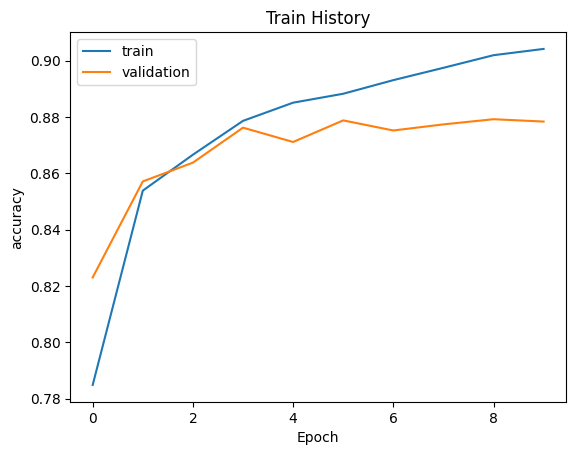

In [127]:
show_train_history(train_history,'accuracy','val_accuracy')


In [128]:
import matplotlib.pyplot as plt

# 畫出訓練過程每一個epoch訓練資料與驗證資料各自準確率(accuracy)的變化，或者損失誤差(loss)的變化
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

# 12.5第三部曲：預測

In [129]:
x_test[5].shape

(784,)

In [130]:
inp = x_test[5].reshape(1,784)

In [131]:
model.predict(inp)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


array([[1.1988939e-04, 9.9985802e-01, 5.7356641e-07, 8.7027074e-06,
        4.2064371e-06, 5.3742522e-10, 8.5633410e-06, 1.2144737e-10,
        3.9978620e-09, 4.5327209e-09]], dtype=float32)

In [132]:
np.argmax([9, 4, 6, 7])

np.int64(0)

In [133]:
np.argmax(model.predict(inp), axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([1])

In [134]:
y_predict = np.argmax(model.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [135]:
y_predict[0]

np.int64(9)

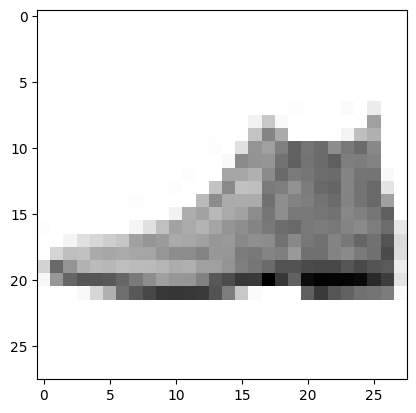

In [136]:
plt.imshow(x_test[0].reshape(28,28), cmap='Greys')

神經網路預測是： 1


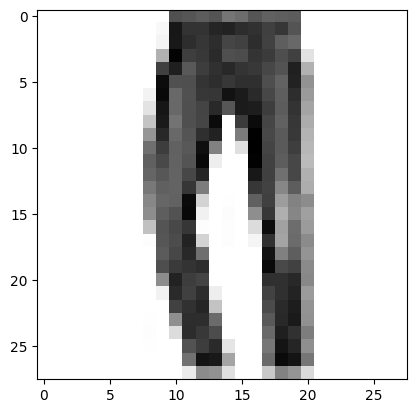

In [137]:
n = 5
print('神經網路預測是：', y_predict[n])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys');

# 12.6更酷炫的互動呈現

In [138]:
#from ipywidgets import interact_manual

In [139]:
def test(測試編號):
  plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys') #要將拉平的維度弄回 (28, 28)
  print('神經網路判斷為:', y_predict[測試編號])

In [140]:
#interact_manual(test, 測試編號=(0, 9999));

到底測試資料總的狀況如何呢? 我們可以給我們神經網路「總評量」。

In [141]:
score = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8732 - loss: 0.3735


In [142]:
print('loss', score[0])
print('正確率', score[1])

loss 0.37502849102020264
正確率 0.8715999722480774


# 12.7儲存我們完整模型

如果對訓練成果滿意, 我們當然不想每次都再訓練一次! 我們可以把神經網路的架構和訓練好的參數都存起來, 以供日後使用!

在 Colab 上, 我們要先連到自己的 Google Drive。

In [143]:
#儲存 model
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


再來是 cd 到你的資料夾中, 我們通常是放到自己 Colab Notebooks 中, 自然你可以指定其他的資料夾。

In [144]:
%cd '/content/drive/My Drive/Colab Notebooks/深度學習/少年Pi'

/content/drive/My Drive/Colab Notebooks/深度學習/少年Pi


In [145]:
model.save('my_dnn_model.keras')

<ipython-input-146-2bf2104ad389>:13: UserWarning: Glyph 27161 (\N{CJK UNIFIED IDEOGRAPH-6A19}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-146-2bf2104ad389>:13: UserWarning: Glyph 31844 (\N{CJK UNIFIED IDEOGRAPH-7C64}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-146-2bf2104ad389>:13: UserWarning: Glyph 36381 (\N{CJK UNIFIED IDEOGRAPH-8E1D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-146-2bf2104ad389>:13: UserWarning: Glyph 38772 (\N{CJK UNIFIED IDEOGRAPH-9774}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-146-2bf2104ad389>:13: UserWarning: Glyph 24676 (\N{CJK UNIFIED IDEOGRAPH-6064}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27161 (\N{CJK UNIFIED IDEOGRAPH-6A19}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPyt

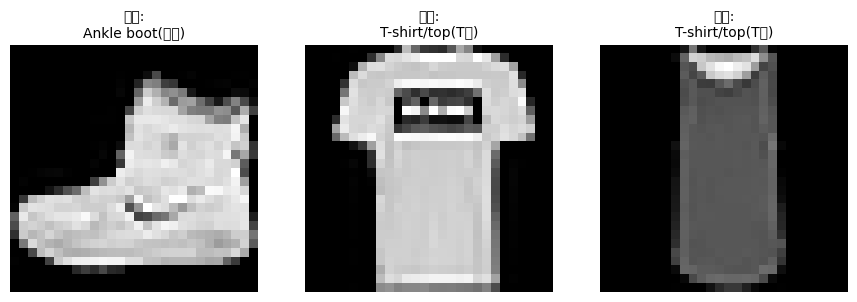

In [146]:
import matplotlib.pyplot as plt
import numpy as np



# 顯示三張訓練圖片與其對應標籤
plt.figure(figsize=(9, 3))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title("標籤:\n" + labels[np.argmax(y_train[i])], fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()

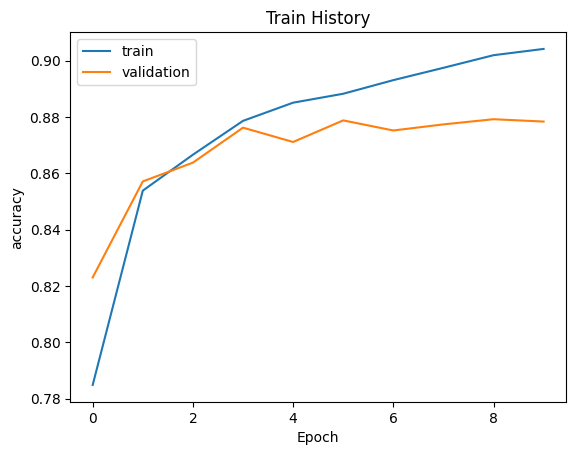

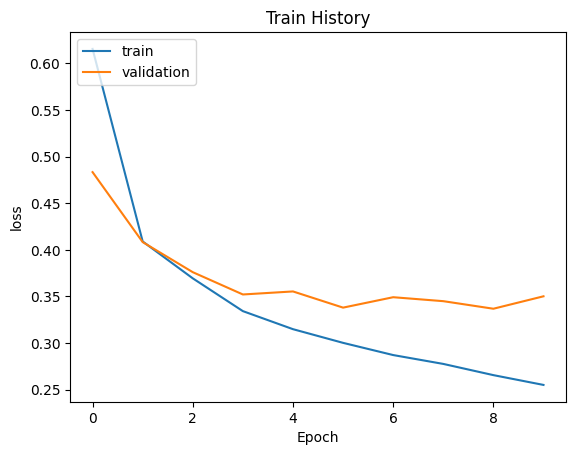

In [147]:
# 繪製 Accuracy 圖
show_train_history(train_history, 'accuracy', 'val_accuracy')
# 繪製 Loss 圖
show_train_history(train_history, 'loss', 'val_loss')

In [148]:
# 用測試資料評估模型
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8732 - loss: 0.3735
Test Accuracy: 87.16%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<ipython-input-149-308ad3f51118>:14: UserWarning: Glyph 36939 (\N{CJK UNIFIED IDEOGRAPH-904B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-149-308ad3f51118>:14: UserWarning: Glyph 21205 (\N{CJK UNIFIED IDEOGRAPH-52D5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-149-308ad3f51118>:14: UserWarning: Glyph 38795 (\N{CJK UNIFIED IDEOGRAPH-978B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-149-308ad3f51118>:14: UserWarning: Glyph 22871 (\N{CJK UNIFIED IDEOGRAPH-5957}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-149-308ad3f51118>:14: UserWarning: Glyph 34923 (\N{CJK UNIFIED IDEOGRAPH-886B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-149-308ad3f51118>:14: UserWarning: Glyph 36381 (\N{CJK UNIFIED IDEOGRAPH-8E1D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-149-308ad3f51118>:14: UserWarning: Glyph 38772 (\N{CJK UNIFIED IDEOGRAPH-9774}) missi

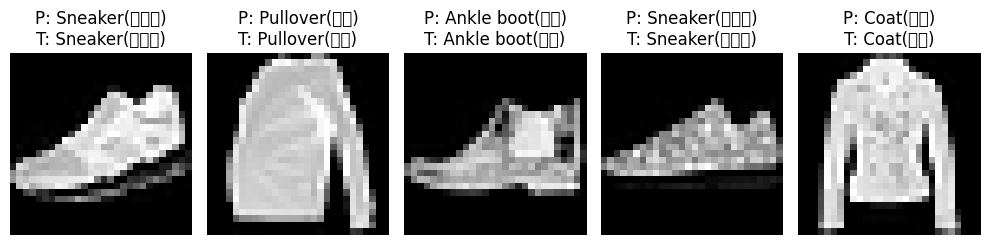

In [149]:

# 預測
predictions = model.predict(x_test)
import random

plt.figure(figsize=(10,4))
for i in range(5):
    idx = random.randint(0, len(x_test)-1)
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    pred_label = labels[np.argmax(predictions[idx])]
    true_label = labels[np.argmax(y_test[idx])]
    plt.title(f"P: {pred_label}\nT: {true_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24676 (\N{CJK UNIFIED IDEOGRAPH-6064}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35122 (\N{CJK UNIFIED IDEOGRAPH-8932}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22871 (\N{CJK UNIFIED IDEOGRAPH-5957}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 34923 (\N{CJK UNIFIED IDEOGRAPH-886B}) missing from font(s) DejaVu Sans.
  fig.canvas

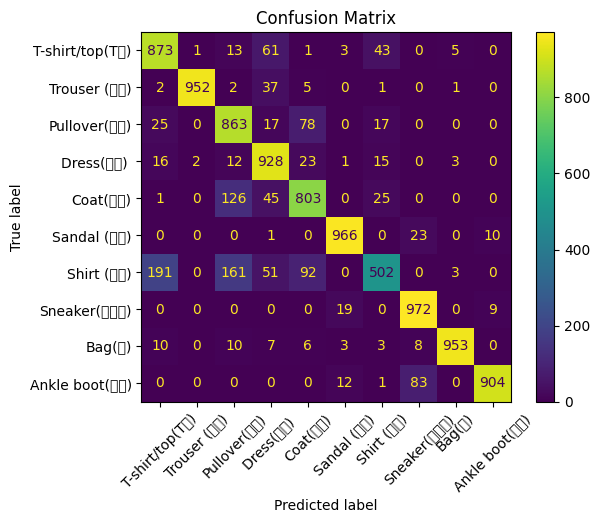

In [150]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


In [151]:
# 儲存完整模型
model.save("fashion_dnn_model.h5")
print("模型已儲存為 fashion_dnn_model.h5")

模型已儲存為 fashion_dnn_model.h5
